# Assignment 1 - AIDI 1002 : Machine Learning Programming  
 

## 1. Consider the dataset ‘noisy_data.csv’ and apply the following pre-processing techniques and obtain the clean dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#loading data
noisy_data = pd.read_csv('noisy_data.csv')
print(noisy_data)

   Region   Age   Income Online Shopper
0   India  49.0  86400.0             No
1  Brazil  32.0  57600.0            Yes
2     USA  35.0  64800.0             No
3  Brazil  43.0  73200.0             No
4     USA  45.0      NaN            Yes
5   India  40.0  69600.0            Yes
6  Brazil   NaN  62400.0             No
7   India  53.0  94800.0            Yes
8     USA  55.0  99600.0             No
9   India  42.0  80400.0            Yes


In [3]:
noisy_data.shape

(10, 4)

In [4]:
noisy_data.describe

<bound method NDFrame.describe of    Region   Age   Income Online Shopper
0   India  49.0  86400.0             No
1  Brazil  32.0  57600.0            Yes
2     USA  35.0  64800.0             No
3  Brazil  43.0  73200.0             No
4     USA  45.0      NaN            Yes
5   India  40.0  69600.0            Yes
6  Brazil   NaN  62400.0             No
7   India  53.0  94800.0            Yes
8     USA  55.0  99600.0             No
9   India  42.0  80400.0            Yes>

### -Handling missing values by imputation

In [5]:
noisy_data.isnull().sum()

Region            0
Age               1
Income            1
Online Shopper    0
dtype: int64

In [6]:
noisy_data['Age'].fillna(noisy_data['Age'].mean(), inplace = True)
noisy_data['Income'].fillna(noisy_data['Income'].mean(), inplace = True)
print(noisy_data)

   Region        Age        Income Online Shopper
0   India  49.000000  86400.000000             No
1  Brazil  32.000000  57600.000000            Yes
2     USA  35.000000  64800.000000             No
3  Brazil  43.000000  73200.000000             No
4     USA  45.000000  76533.333333            Yes
5   India  40.000000  69600.000000            Yes
6  Brazil  43.777778  62400.000000             No
7   India  53.000000  94800.000000            Yes
8     USA  55.000000  99600.000000             No
9   India  42.000000  80400.000000            Yes


### -Apply Normality tests to numerical columns and state the hypothesis clearly and comment on the normality of the data

In [7]:
import scipy.stats as stats
import matplotlib.pyplot as plt

Here we did two tests for checking Normality test on both Age and Income columns
1. Using QQ Plot
2. Using Shapiro-Wilk Test

#### Using QQ PLot

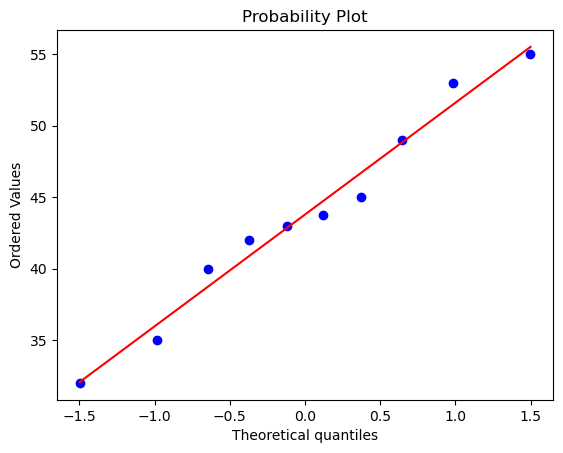

In [8]:
# Testing Age column

stats.probplot(noisy_data["Age"], dist='norm',plot=plt)
plt.show()

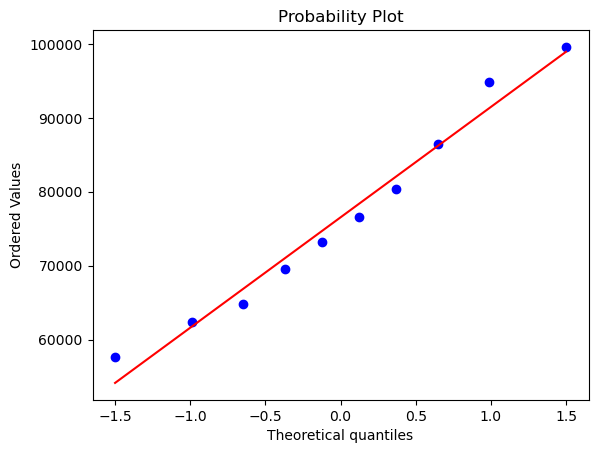

In [9]:
# Testing Income column

stats.probplot(noisy_data["Income"], dist='norm',plot=plt)
plt.show()

#### we can see in both the cases our data points comes in straight lines that means our data is normally distributed.

### Using Shapiro-Wilk Test

In [10]:
# Testing Age column

from scipy .stats import shapiro

stat,p = shapiro(noisy_data["Age"])
print('stat=%.3f, p=%.3f\n' % (stat,p))

stat=0.971, p=0.902



In [11]:
# Testing Income column

from scipy .stats import shapiro

stat,p = shapiro(noisy_data["Income"])
print('stat=%.3f, p=%.3f\n' % (stat,p))

stat=0.963, p=0.815



#### We can see our p-value is > 0.05, then we fail to reject null hypothesis. we assume the distribution of our variable is normal.

### -Apply encodings for categorical variable and scale the features.

For encoding applied one-hot encoder

In [12]:
# Applied one-hot encoding to categorical columns
noisy_data = pd.get_dummies(noisy_data, columns=['Region', 'Online Shopper'])

For scaling used MinMax Scaler

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the 'Age' and 'Income' columns to the range [0, 1]
noisy_data[['Age', 'Income']] = scaler.fit_transform(noisy_data[['Age', 'Income']])


In [14]:
print(noisy_data)

        Age    Income  Region_Brazil  Region_India  Region_USA  \
0  0.739130  0.685714              0             1           0   
1  0.000000  0.000000              1             0           0   
2  0.130435  0.171429              0             0           1   
3  0.478261  0.371429              1             0           0   
4  0.565217  0.450794              0             0           1   
5  0.347826  0.285714              0             1           0   
6  0.512077  0.114286              1             0           0   
7  0.913043  0.885714              0             1           0   
8  1.000000  1.000000              0             0           1   
9  0.434783  0.542857              0             1           0   

   Online Shopper_No  Online Shopper_Yes  
0                  1                   0  
1                  0                   1  
2                  1                   0  
3                  1                   0  
4                  0                   1  
5              

## 2. Consider the text present in the file ‘wiki.txt’ and Answer the following questions :

In [15]:
import nltk
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.corpus import stopwords

In [16]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
with open("wiki.txt", "r") as file:
    text = file.read()

### -Write a program to convert following text into tokens with two tokenization methods such as ‘RegexpTokenizer()’ and ‘word_tokenize()’ from NLTK library.

In [18]:
# Remove stop words and punctuation
stop_words = set(stopwords.words('english'))

In [19]:
# Tokenize Using RegexpTokenizer

tokenizer1 = RegexpTokenizer(r'\w+')
tokens = tokenizer1.tokenize(text)
print("Tokens using Regexp Tokenizer:", tokens)

tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]
print("\nTokens after removing stop words and punctuation:")
print("Tokens using Regexp Tokenizer:", tokens)

Tokens using Regexp Tokenizer: ['The', 'history', 'of', 'NLP', 'generally', 'started', 'in', 'the', '1950s', 'although', 'work', 'can', 'be', 'found', 'from', 'earlier', 'periods', 'In', '1950', 'Alan', 'Turing', 'published', 'an', 'article', 'titled', 'Computing', 'Machinery', 'and', 'Intelligence', 'which', 'proposed', 'what', 'is', 'now', 'called', 'the', 'Turing', 'test', 'as', 'a', 'criterion', 'of', 'intelligence', 'The', 'Georgetown', 'experiment', 'in', '1954', 'involved', 'fully', 'automatic', 'translation', 'of', 'more', 'than', 'sixty', 'Russian', 'sentences', 'into', 'English', 'The', 'authors', 'claimed', 'that', 'within', 'three', 'or', 'five', 'years', 'machine', 'translation', 'would', 'be', 'a', 'solved', 'problem', '2', 'However', 'real', 'progress', 'was', 'much', 'slower', 'and', 'after', 'the', 'ALPAC', 'report', 'in', '1966', 'which', 'found', 'that', 'ten', 'year', 'long', 'research', 'had', 'failed', 'to', 'fulfill', 'the', 'expectations', 'funding', 'for', 'mac

In [20]:
# Tokenize Using word_tokenize

tokenizer2 = word_tokenize
tokens_word = tokenizer2(text)
print("Tokens Using word_tokenize:", tokens_word)

tokens_word = [word for word in tokens_word if word.lower() not in stop_words and word.isalpha()]

print("\nTokens after removing stop words and punctuation:")
print("\n\nTokens Using word_tokenize:", tokens_word)

Tokens Using word_tokenize: ['The', 'history', 'of', 'NLP', 'generally', 'started', 'in', 'the', '1950s', ',', 'although', 'work', 'can', 'be', 'found', 'from', 'earlier', 'periods', '.', 'In', '1950', ',', 'Alan', 'Turing', 'published', 'an', 'article', 'titled', '``', 'Computing', 'Machinery', 'and', 'Intelligence', "''", 'which', 'proposed', 'what', 'is', 'now', 'called', 'the', 'Turing', 'test', 'as', 'a', 'criterion', 'of', 'intelligence', '.', 'The', 'Georgetown', 'experiment', 'in', '1954', 'involved', 'fully', 'automatic', 'translation', 'of', 'more', 'than', 'sixty', 'Russian', 'sentences', 'into', 'English', '.', 'The', 'authors', 'claimed', 'that', 'within', 'three', 'or', 'five', 'years', ',', 'machine', 'translation', 'would', 'be', 'a', 'solved', 'problem', '.', '[', '2', ']', 'However', ',', 'real', 'progress', 'was', 'much', 'slower', ',', 'and', 'after', 'the', 'ALPAC', 'report', 'in', '1966', ',', 'which', 'found', 'that', 'ten-year-long', 'research', 'had', 'failed',

### -Write a regular expression to extract all the year mentions in the ‘wiki.txt’ file.

In [21]:
import re

def find_years_in_text(input_text):
    return re.findall(r"\b\d{4}\b", input_text)

with open("wiki.txt", "r") as file:
    text = file.read()
    found_years = find_years_in_text(text)
    print("Years In Text:" , found_years)

Years In Text: ['1950', '1954', '1966', '1964', '1966']


###  -State the differences observed in the output of tokenization methods.

#### - RegexpTokenizer() splits the text based on certain patterns, such as non-alphanumeric characters and whitespace.

Ex. 'problem', '2', 'However

#### word_tokenize() splits the text into tokens based on language-specific rules, handling punctuation and alphanumeric characters differently.
    
Ex. 'problem', '.', '[', '2', ']', 'However'

#### - RegexpTokenizer()' relies on regular expressions for customization and can split tokens based on defined pattern.

Ex. 'ten', 'year', 'long'

#### 'word_tokenize()' is more language-aware and handles contractions and hyphenated words as single tokens.

Ex.'ten-year-long'

#### - Both tokenizers maintain the capitalization of words in the output tokens.

Example:

'RegexpTokenizer()': 'The', 'history', 'of', 'NLP'

'word_tokenize()': 'The', 'history', 'of', 'NLP'

#### In conclusion, the specific requirements of our text processing task should be taken into consideration when deciding between "RegexpTokenizer()" and "word_tokenize()":

#### Use the 'RegexpTokenizer()' function to split text based on specially defined regular expressions when we need fine-grained control over tokenization patterns.

#### Use 'word_tokenize()' when we need a more language-sensitive tokenization technique that can handle contractions, hyphenated words, and specific punctuation marks without requiring a lot of customization.

## 3. Consider this dataset from kaggle. (Download the dataset from following link : https://www.kaggle.com/dansbecker/melbourne-housing-snapshot/home) and answer the following questions : 

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFpr, chi2, SelectKBest, SelectFwe, f_classif, SelectFdr
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

In [23]:
melb_data = pd.read_csv('melb_data.csv')

In [24]:
melb_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [25]:
melb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [26]:
melb_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [27]:
#Dropping the data with categorical values

melb_data = melb_data.drop(columns=['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname'])

In [28]:
melb_data.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.7969,144.9969,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0


In [29]:
melb_data.isnull().sum()

Rooms               0
Price               0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Lattitude           0
Longtitude          0
Propertycount       0
dtype: int64

In [30]:
melb_data.isnull().mean()

Rooms            0.000000
Price            0.000000
Distance         0.000000
Postcode         0.000000
Bedroom2         0.000000
Bathroom         0.000000
Car              0.004566
Landsize         0.000000
BuildingArea     0.474963
YearBuilt        0.395803
Lattitude        0.000000
Longtitude       0.000000
Propertycount    0.000000
dtype: float64

In [31]:
# Dropping Rows with the Null values

melb_data.dropna(inplace=True)
melb_data

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,2329.0
13573,4,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,16166.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


### Apply the feature selection techniques over the melbourne-housing -dataset namely

In [32]:
X = melb_data.drop(['Price'], axis=1)
y = melb_data.Price

#Normalize data
X=(X-X.min())/(X.max()-X.min())

In [33]:
# Function to calculate correlation
def calculate_correlation(X, y):
    corr_scores = X.corrwith(y).abs()
    return corr_scores

# Function to calculate Chi-Square 
def calculate_chi_square(X, y):
    selector = SelectKBest(score_func=chi2, k=6)
    new_data = selector.fit_transform(X, y)
    # Get the Chi-Square scores for each feature
    chi2_scores = selector.scores_
    return chi2_scores

# Function to calculate Mutual Information
def calculate_mutual_info(X, y):
    selector = SelectKBest(score_func=mutual_info_classif, k=6)
    new_data = selector.fit_transform(X, y)
    # Get the MI scores for each feature
    mi_scores = selector.scores_
    return mi_scores

# Function to calculate Random Forest feature importance
def calculate_random_forest_importance(X, y):
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)
    importances = rf.feature_importances_
    return importances


### Correlation

Best Features based on Correlation:
BuildingArea     0.520492
Rooms            0.517718
Bedroom2         0.500452
Bathroom         0.492481
YearBuilt        0.307343
Car              0.250916
Lattitude        0.216919
Longtitude       0.209786
Distance         0.164975
Postcode         0.109343
Landsize         0.073536
Propertycount    0.053336
dtype: float64


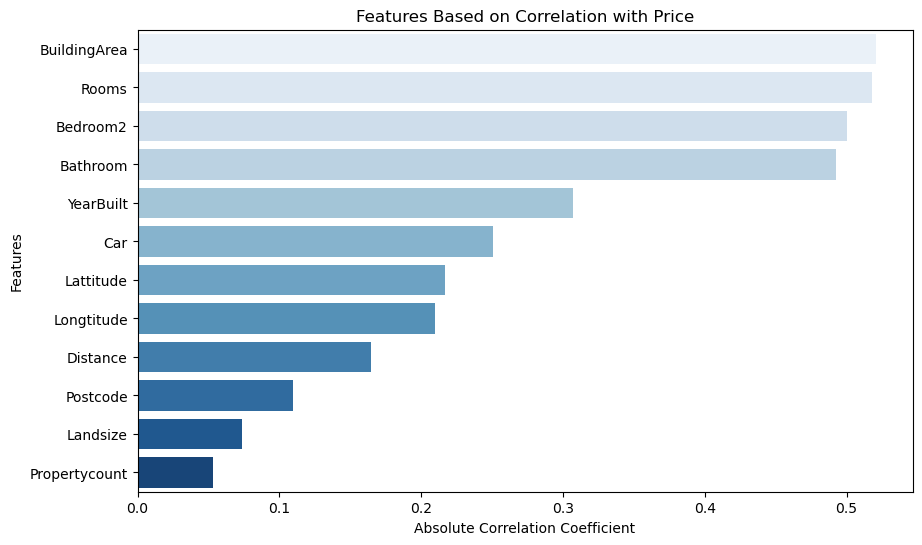

In [34]:
# Calculate scores using Correlation technique
corr_scores = calculate_correlation(X, y)    

# Sort features by their correlation with the target variable
sorted_features = corr_scores.sort_values(ascending=False)

# Print the best features
print("Best Features based on Correlation:")
print(sorted_features)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_features.values, y=sorted_features.index, palette='Blues')
plt.xlabel('Absolute Correlation Coefficient')
plt.ylabel('Features')
plt.title(f'Features Based on Correlation with Price')
plt.show()

###  Chi-Square

          Feature  Chi-Squared Score
8       YearBuilt           5.234159
9       Lattitude          45.449567
10     Longtitude          49.932109
6        Landsize          67.332859
7    BuildingArea          71.722195
5             Car         116.091970
3        Bedroom2         118.235687
1        Distance         134.279958
2        Postcode         142.761512
11  Propertycount         207.073015
0           Rooms         236.868649
4        Bathroom         376.029073


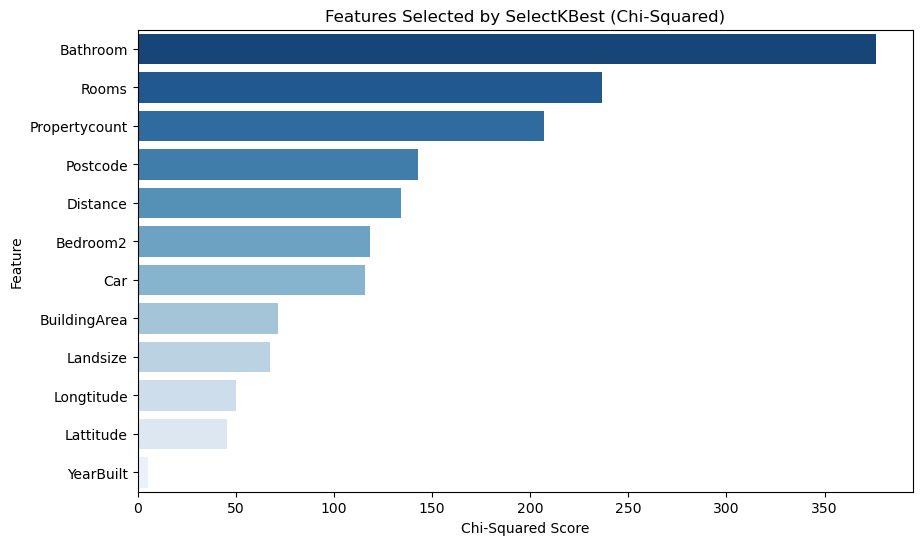

In [35]:
# Calculate scores using chi2 Square technique

chi2_scores = calculate_chi_square(X, y)
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi-Squared Score': chi2_scores
})

# Sort the DataFrame by Chi-Squared Score 
feature_scores = feature_scores.sort_values(by='Chi-Squared Score', ascending=True)

print(feature_scores)

# Create a horizontal bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Chi-Squared Score', y='Feature', data=feature_scores, palette='Blues')
plt.xlabel('Chi-Squared Score')
plt.title('Features Selected by SelectKBest (Chi-Squared)')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest score at the top
plt.show()

### Mutual-Information

          Feature  Mutual Information Score
11  Propertycount                  0.053668
1        Distance                  0.067176
10     Longtitude                  0.109382
2        Postcode                  0.110817
9       Lattitude                  0.122020
6        Landsize                  0.138852
8       YearBuilt                  0.178048
4        Bathroom                  0.369838
7    BuildingArea                  0.397325
5             Car                  0.526271
0           Rooms                  0.574003
3        Bedroom2                  0.581685


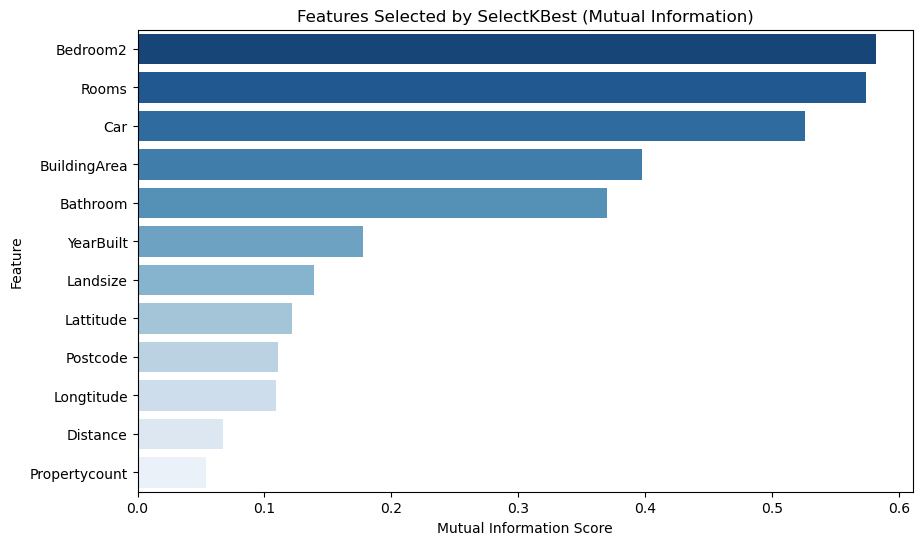

In [36]:
# Calculate scores using Mutual information technique

mi_scores = calculate_mutual_info(X, y)

# Create a DataFrame to store feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information Score': mi_scores
})

# Sort the DataFrame by Mutual Information Score 
feature_scores = feature_scores.sort_values(by='Mutual Information Score', ascending=True)

print(feature_scores)

# Create a horizontal bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual Information Score', y='Feature', data=feature_scores, palette='Blues')
plt.xlabel('Mutual Information Score')
plt.title('Features Selected by SelectKBest (Mutual Information)')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest score at the top
plt.show()

### Random Forest feature importance

               Importance
Car              0.009592
Bedroom2         0.010290
Bathroom         0.016192
Propertycount    0.017296
Rooms            0.017709
Longtitude       0.049088
Lattitude        0.067035
Landsize         0.076421
Postcode         0.091973
YearBuilt        0.114033
Distance         0.144832
BuildingArea     0.385538


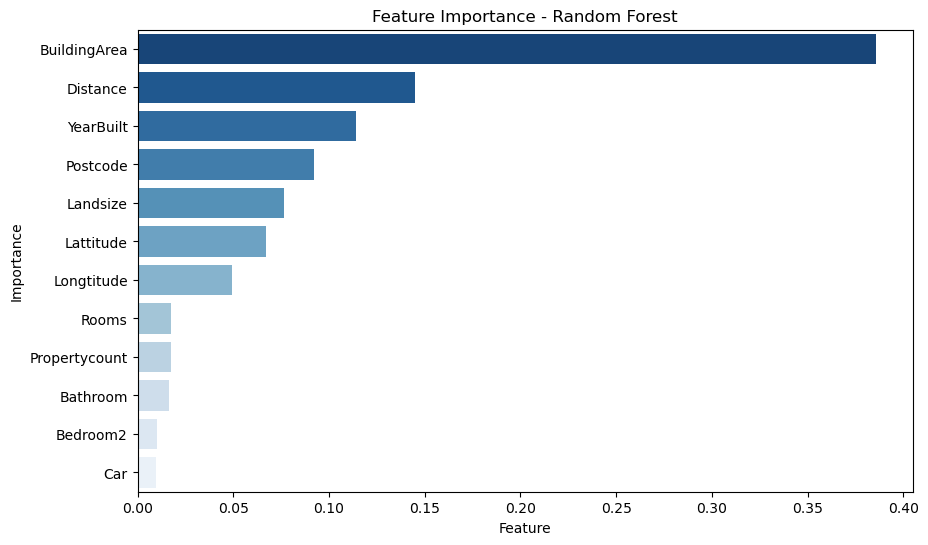

In [37]:
# Calculate scores using RAndom FOrest Regressor technique

rf_importances = calculate_random_forest_importance(X, y)

# Create a DataFrame to store feature importances
feat_importances = pd.DataFrame(rf_importances, index=X.columns, columns=["Importance"])

# Sort the DataFrame by Importance 
feat_importances = feat_importances.sort_values(by="Importance", ascending=True)

print(feat_importances)

# Create a bar chart using Seaborn for the top 5 features with a custom color
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances["Importance"], y=feat_importances.index, palette='Blues')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.gca().invert_yaxis() 
plt.show()

###  Compare the importance of selected features using bar chart 

In [38]:
# Create a DataFrame to store feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Correlation': corr_scores,
    'Chi-Square': chi2_scores,
    'Mutual Information': mi_scores,
    'Random Forest Importance': rf_importances
})

from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Specify the columns to be scaled
columns_to_scale = ['Correlation', 'Chi-Square', 'Mutual Information', 'Random Forest Importance']

# Scale the selected columns
feature_scores[columns_to_scale] = scaler.fit_transform(feature_scores[columns_to_scale])


#### Here, I applied scaling to ensure that all results, which have different scales and ratios, are normalized for easy and meaningful comparison.

<Figure size 2000x1800 with 0 Axes>

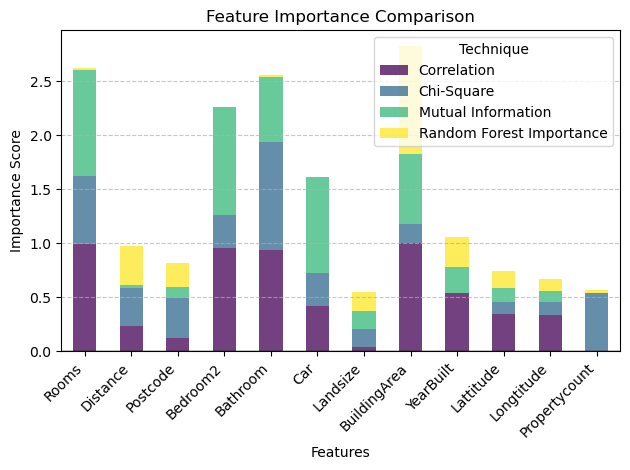

In [39]:
# Create a bar chart with stacked bars for feature scores
plt.figure(figsize=(20, 18))
feature_scores.plot(kind='bar', stacked=True, colormap='viridis', alpha=0.75)
plt.title('Feature Importance Comparison')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.legend(title='Technique')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')

# Adding a horizontal line for better visualization
plt.axhline(y=0, color='black', linewidth=1)

plt.tight_layout()
plt.show()


### Comment on the results obtained from various feature selection techniques and which is the best and worst feature selection selection technique on the given dataset

#### Correlation:

Features like BuildingArea, Rooms, Bedroom2, and Bathroom exhibit strong positive correlations with the target variable Price. 

YearBuilt, Car, Lattitude, and Longtitude also show positive correlations with Price, although they are not as strong as the top features.

Some features like Distance, Postcode, Landsize, and Propertycount have weaker positive correlations with Price, suggesting that they may have less influence on property prices.

#### Chi-square:

The features with the highest Chi-Squared scores, namely Bathroom and Rooms, are the most influential in determining property prices.

Several features, including Propertycount, Postcode, Distance, Car, Bedroom2, BuildingArea, Landsize, Longtitude, and Lattitude, exhibit moderate but significant associations with property prices.

YearBuilt has the lowest Chi-Squared score, suggesting a weaker association with property prices compared to other features. 


#### Mutual Information:

Features like the number of bedrooms, rooms, car spaces, and building area are the most informative and influential factors in predicting property prices.

Geographic and location-related features, such as latitude, longitude, postcode, and The year of construction (YearBuilt), have a moderate to lower influence on property prices.

Distance and property count have the least impact on property prices, according to Mutual Information scores.

#### Random Forest

The results indicate that BuildingArea, Distance, YearBuilt, Postcode, Landsize, and geographic coordinates (Lattitude and Longtitude) are among the most influential factors in determining property prices.

Rooms,property count , athroom and Bedroom2 have the least impact on property prices.

In [40]:
# Find the best and worst feature selection technique

numeric_feature_scores = feature_scores.select_dtypes(include=np.number)
best_technique = numeric_feature_scores.mean().idxmax()
worst_technique = numeric_feature_scores.mean().idxmin()

print(f"The best feature selection technique is: {best_technique}")
print(f"The worst feature selection technique is: {worst_technique}")

The best feature selection technique is: Correlation
The worst feature selection technique is: Random Forest Importance


#### For the best and the worst feature selection technique, we can conclude from the result that 'Correlation' would be the best choice for the dataset and 'Random Forest' would be the worst. 